In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/bir

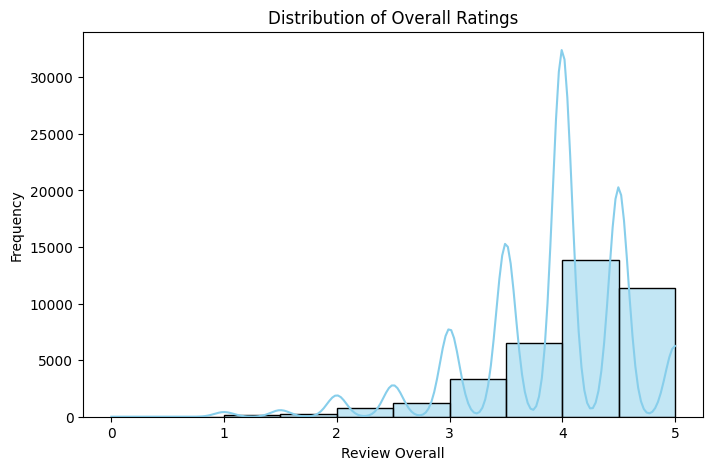

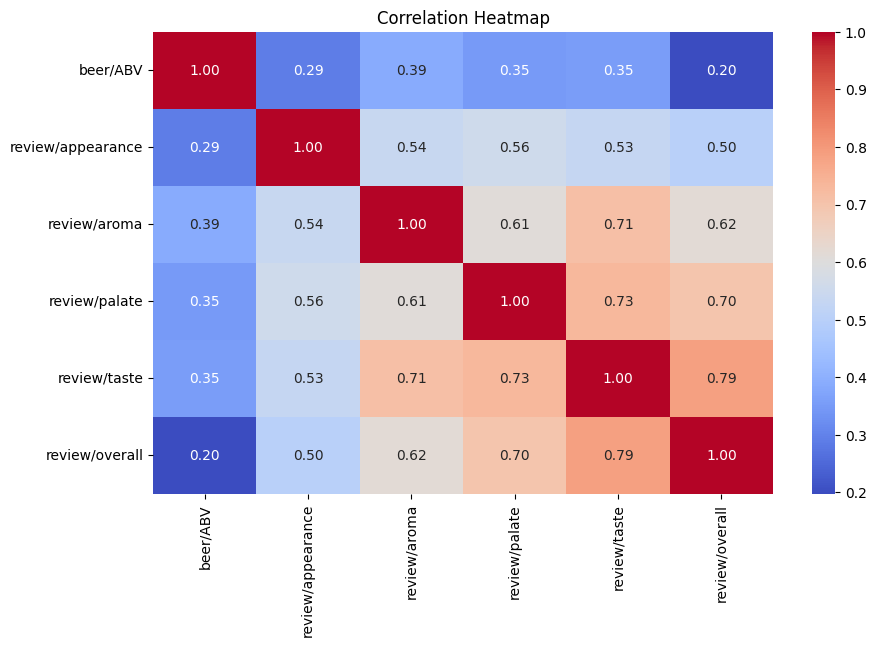

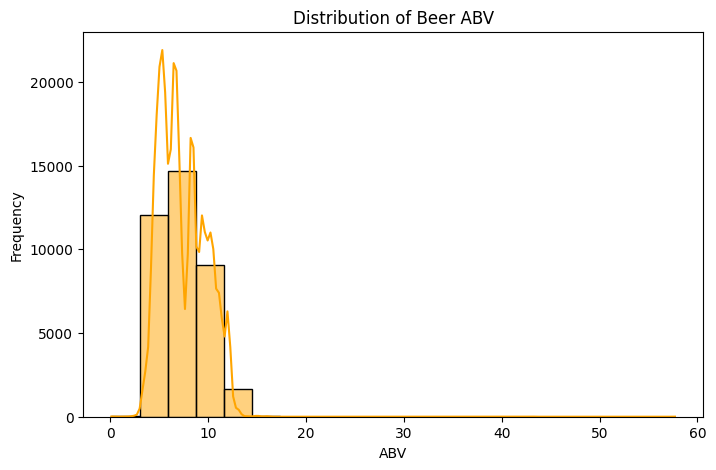

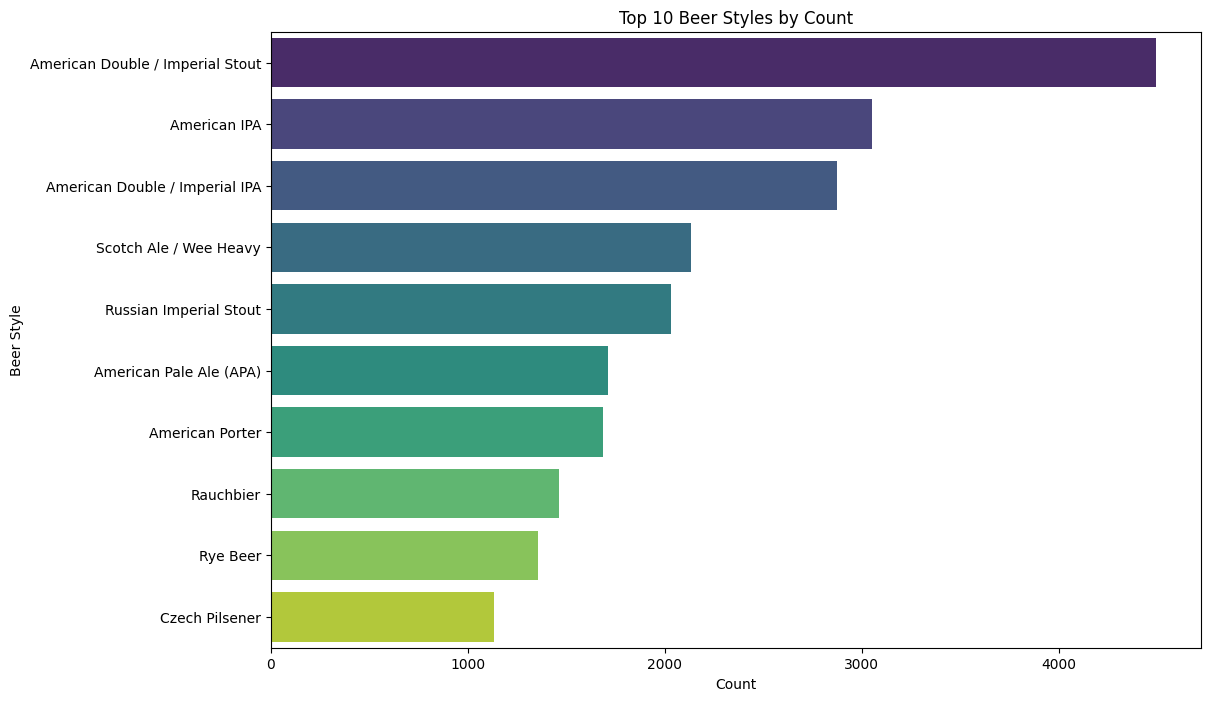

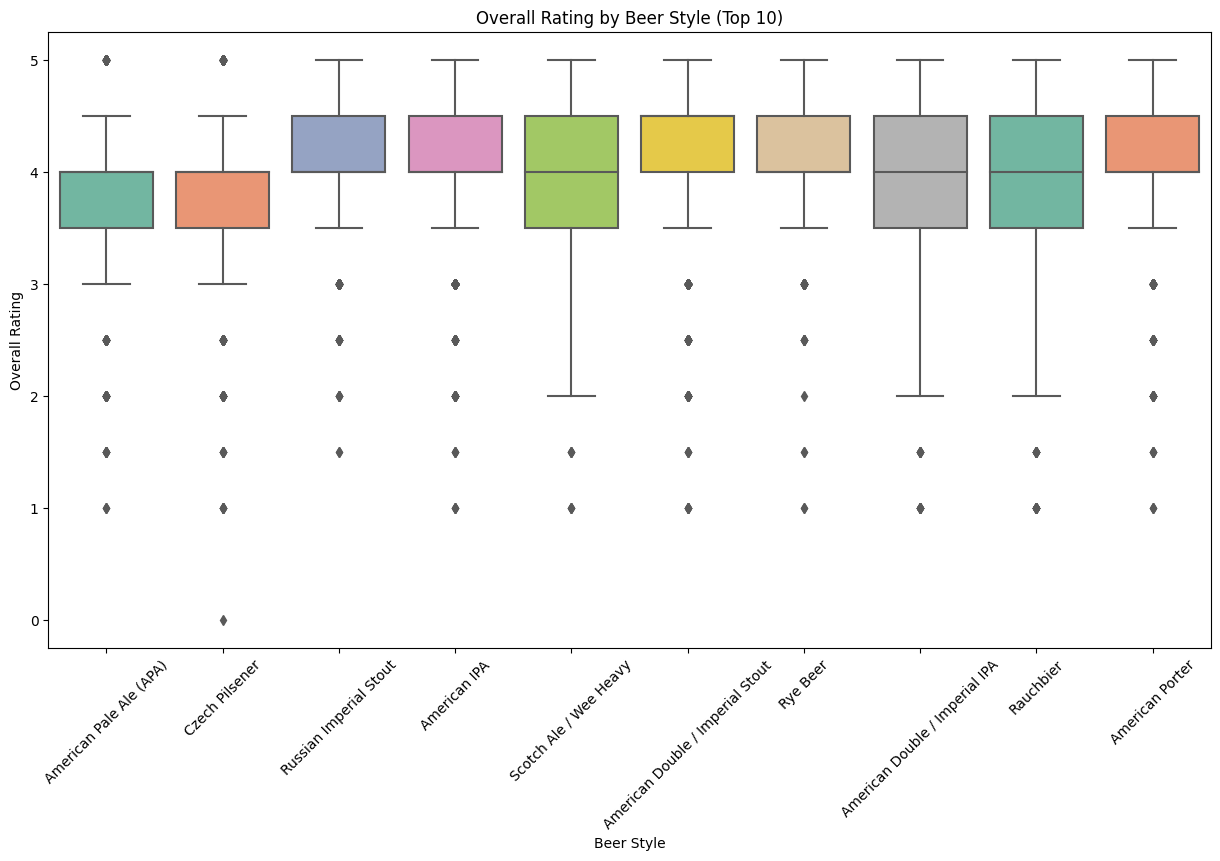

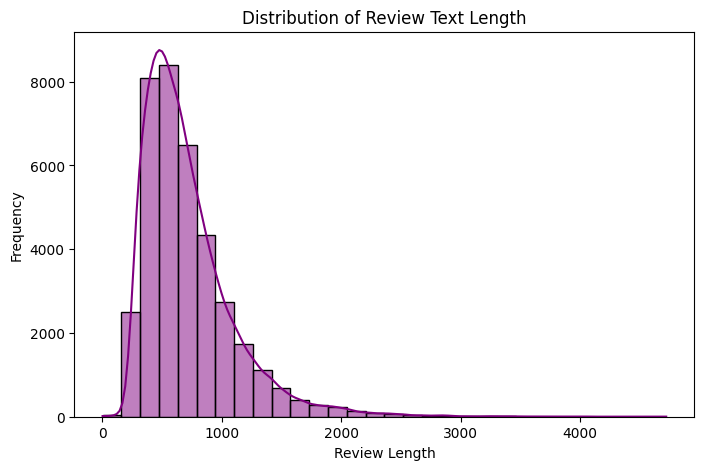

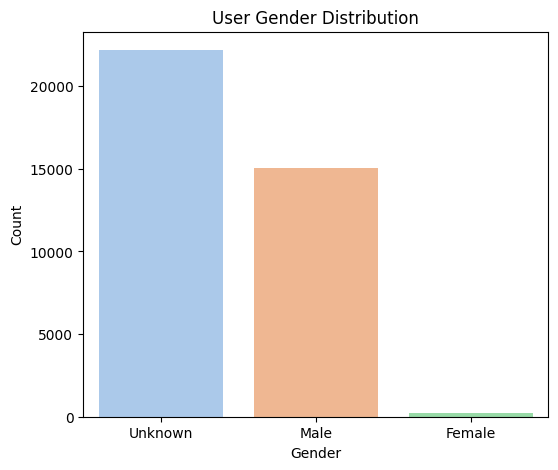

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'train.csv' with your actual file name)
data = pd.read_csv('/kaggle/input/beer-rating-reviews/train.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Checking for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())

# Summary statistics of numerical features
print("\nSummary Statistics of Numerical Features:")
print(data.describe())


# Distribution of the target variable (review/overall)
plt.figure(figsize=(8, 5))
sns.histplot(data['review/overall'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Review Overall')
plt.ylabel('Frequency')
plt.show()


# Correlation Heatmap
numeric_features = ['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'review/overall']
plt.figure(figsize=(10, 6))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Distribution of 'beer/ABV' (Alcohol by Volume)
plt.figure(figsize=(8, 5))
sns.histplot(data['beer/ABV'].dropna(), bins=20, kde=True, color='orange')
plt.title('Distribution of Beer ABV')
plt.xlabel('ABV')
plt.ylabel('Frequency')
plt.show()

# Analyzing categorical feature: beer/style
plt.figure(figsize=(12, 8))
top_styles = data['beer/style'].value_counts().head(10)
sns.barplot(x=top_styles.values, y=top_styles.index, palette='viridis')
plt.title('Top 10 Beer Styles by Count')
plt.xlabel('Count')
plt.ylabel('Beer Style')
plt.show()

# Boxplot of overall rating by beer style
top_styles_list = top_styles.index.tolist()
filtered_data = data[data['beer/style'].isin(top_styles_list)]
plt.figure(figsize=(15, 8))
sns.boxplot(x='beer/style', y='review/overall', data=filtered_data, palette='Set2')
plt.title('Overall Rating by Beer Style (Top 10)')
plt.xticks(rotation=45)
plt.xlabel('Beer Style')
plt.ylabel('Overall Rating')
plt.show()

# Analyzing review text length
data['review_length'] = data['review/text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8, 5))
sns.histplot(data['review_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Review Text Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution
plt.figure(figsize=(6, 5))
gender_counts = data['user/gender'].fillna('Unknown').value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('User Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



=== Detailed Rating Analysis ===


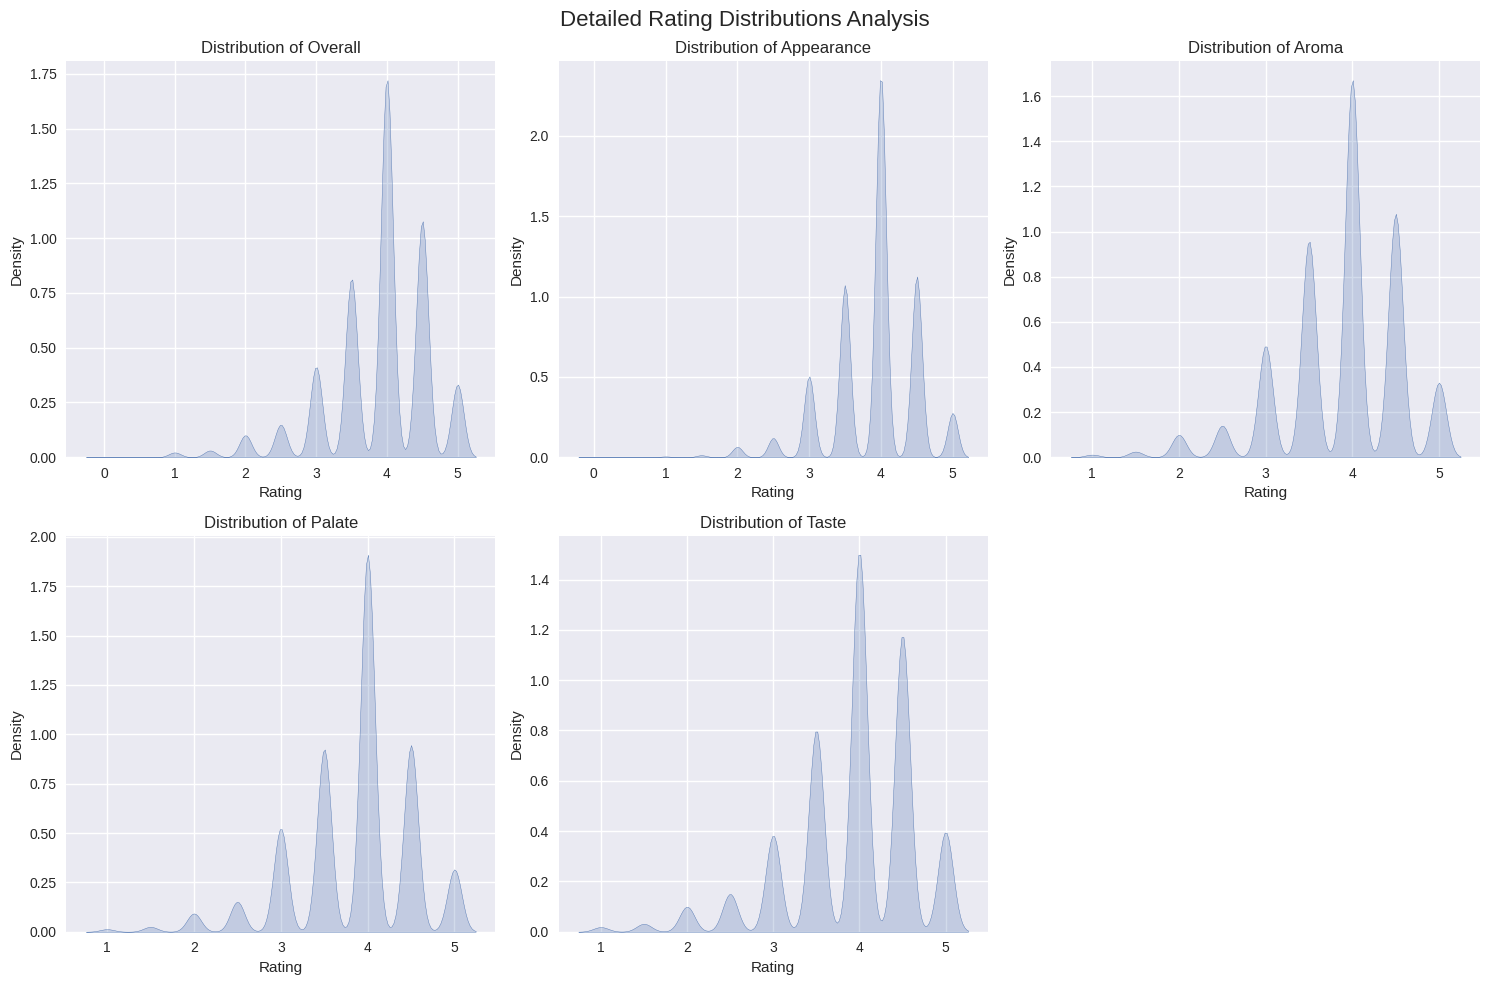


Rating Statistics:
      review/overall  review/appearance  review/aroma  review/palate  \
mean           3.889              3.900         3.873          3.855   
std            0.700              0.589         0.681          0.668   
skew          -1.040             -0.793        -0.830         -0.840   
kurt           1.743              1.517         1.168          1.335   

      review/taste  
mean         3.922  
std          0.716  
skew        -1.001  
kurt         1.459  

=== Beer Style Analysis ===

Top 10 Beer Styles by Review Count:
                                  review_count  avg_rating  rating_std  \
beer/style                                                               
American Double / Imperial Stout          4490       4.327       0.567   
American IPA                              3048       4.045       0.542   
American Double / Imperial IPA            2871       3.869       0.654   
Scotch Ale / Wee Heavy                    2133       3.919       0.582   
Russ

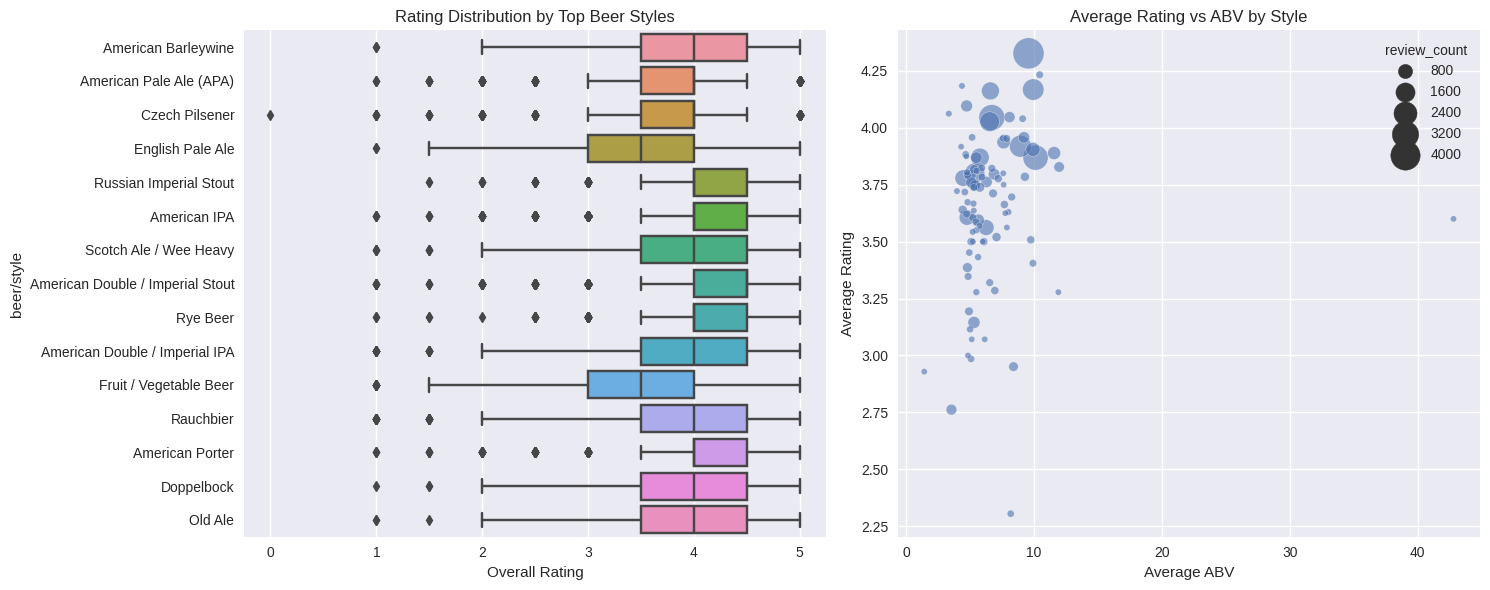


=== User Behavior Analysis ===

User Rating Behavior:
       review_count  avg_rating  rating_std  unique_styles
count      7439.000    7439.000    4283.000       7439.000
mean          5.039       3.936       0.552          3.926
std           8.277       0.609       0.335          5.081
min           1.000       1.000       0.000          1.000
25%           1.000       3.667       0.354          1.000
50%           2.000       4.000       0.500          2.000
75%           5.000       4.300       0.707          5.000
max         141.000       5.000       2.828         64.000


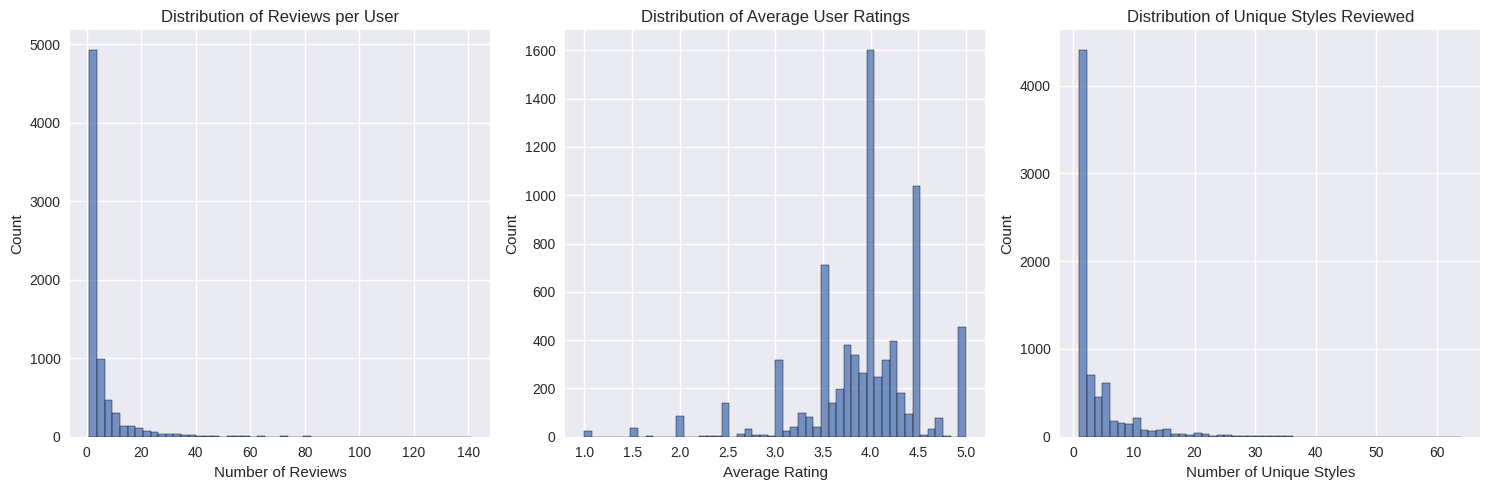


=== Review Text Analysis ===

Text Statistics:
       text_length  word_count
count     37485.00    37485.00
mean        719.09      128.14
std         388.44       70.10
min          49.00        7.00
25%         453.00       80.00
50%         627.00      112.00
75%         874.00      156.00
max        4721.00      892.00


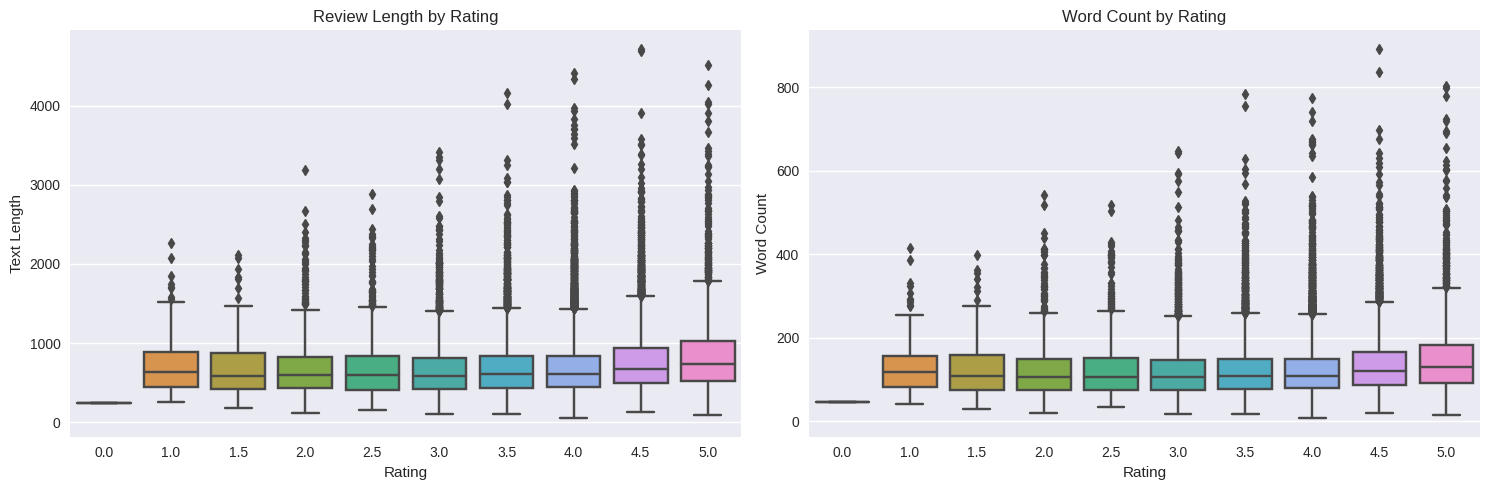


=== Temporal Analysis ===


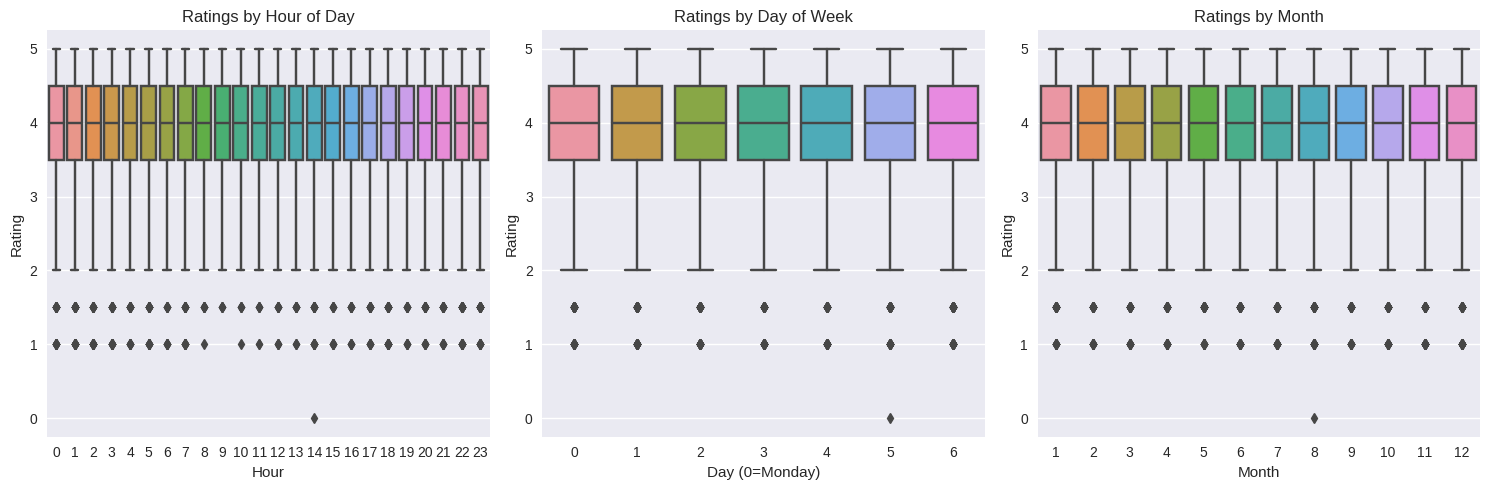


=== Brewery Analysis ===

Top Breweries by Review Count:
               review_count  avg_rating  rating_std  unique_styles  avg_abv
beer/brewerId                                                              
1199                  14968       4.114       0.585             34    8.897
394                    2936       3.920       0.579             30    6.841
14879                  2349       3.934       0.649             14    8.749
263                    1809       3.915       0.706              3    5.764
3268                   1277       3.656       0.706             16    5.884
395                    1225       3.662       0.721             41    7.270
365                    1069       3.781       0.604             17    6.889
1                      1016       3.822       0.702              4    4.440
1417                    908       3.708       0.663              6    4.827
14                      834       4.040       0.543             47    6.948

Key Insights for Feature Engi

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)

# 1. Advanced Rating Analysis
print("\n=== Detailed Rating Analysis ===")

# Create figure for rating distributions
plt.figure(figsize=(15, 10))
plt.suptitle("Detailed Rating Distributions Analysis", fontsize=16)

# All ratings distribution comparison
rating_cols = ['review/overall', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste']
for idx, col in enumerate(rating_cols, 1):
    plt.subplot(2, 3, idx)
    sns.kdeplot(data=data[col], fill=True)
    plt.title(f'Distribution of {col.split("/")[1].title()}')
    plt.xlabel('Rating')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Calculate rating statistics
print("\nRating Statistics:")
rating_stats = data[rating_cols].agg(['mean', 'std', 'skew', 'kurt']).round(3)
print(rating_stats)

# 2. Beer Style Analysis
print("\n=== Beer Style Analysis ===")

# Calculate style statistics
style_stats = data.groupby('beer/style').agg({
    'review/overall': ['count', 'mean', 'std'],
    'beer/ABV': 'mean'
}).round(3)

style_stats.columns = ['review_count', 'avg_rating', 'rating_std', 'avg_abv']
style_stats = style_stats.sort_values('review_count', ascending=False)

print("\nTop 10 Beer Styles by Review Count:")
print(style_stats.head(10))

# Visualize style vs rating relationship
plt.figure(figsize=(15, 6))
top_styles = style_stats.head(15).index

plt.subplot(1, 2, 1)
sns.boxplot(data=data[data['beer/style'].isin(top_styles)], 
            x='review/overall', y='beer/style')
plt.title('Rating Distribution by Top Beer Styles')
plt.xlabel('Overall Rating')

plt.subplot(1, 2, 2)
sns.scatterplot(data=style_stats, x='avg_abv', y='avg_rating', 
                size='review_count', sizes=(20, 500), alpha=0.6)
plt.title('Average Rating vs ABV by Style')
plt.xlabel('Average ABV')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

# 3. User Analysis
print("\n=== User Behavior Analysis ===")

# Calculate user statistics
user_stats = data.groupby('user/profileName').agg({
    'review/overall': ['count', 'mean', 'std'],
    'beer/style': 'nunique'
}).round(3)

user_stats.columns = ['review_count', 'avg_rating', 'rating_std', 'unique_styles']
print("\nUser Rating Behavior:")
print(user_stats.describe().round(3))

# Visualize user rating patterns
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(user_stats['review_count'], bins=50)
plt.title('Distribution of Reviews per User')
plt.xlabel('Number of Reviews')

plt.subplot(1, 3, 2)
sns.histplot(user_stats['avg_rating'], bins=50)
plt.title('Distribution of Average User Ratings')
plt.xlabel('Average Rating')

plt.subplot(1, 3, 3)
sns.histplot(user_stats['unique_styles'], bins=50)
plt.title('Distribution of Unique Styles Reviewed')
plt.xlabel('Number of Unique Styles')

plt.tight_layout()
plt.show()

# 4. Text Analysis
print("\n=== Review Text Analysis ===")

# Calculate text statistics
data['text_length'] = data['review/text'].str.len()
data['word_count'] = data['review/text'].str.split().str.len()

print("\nText Statistics:")
text_stats = data[['text_length', 'word_count']].describe().round(2)
print(text_stats)

# Analyze relationship between text length and rating
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='review/overall', y='text_length', data=data)
plt.title('Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Text Length')

plt.subplot(1, 2, 2)
sns.boxplot(x='review/overall', y='word_count', data=data)
plt.title('Word Count by Rating')
plt.xlabel('Rating')
plt.ylabel('Word Count')

plt.tight_layout()
plt.show()

# 5. Time Analysis
print("\n=== Temporal Analysis ===")

# Convert Unix timestamp to datetime
data['review_time'] = pd.to_datetime(data['review/timeUnix'], unit='s')
data['hour'] = data['review_time'].dt.hour
data['day_of_week'] = data['review_time'].dt.dayofweek
data['month'] = data['review_time'].dt.month
data['year'] = data['review_time'].dt.year

# Analyze rating patterns over time
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='hour', y='review/overall', data=data)
plt.title('Ratings by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Rating')

plt.subplot(1, 3, 2)
sns.boxplot(x='day_of_week', y='review/overall', data=data)
plt.title('Ratings by Day of Week')
plt.xlabel('Day (0=Monday)')
plt.ylabel('Rating')

plt.subplot(1, 3, 3)
sns.boxplot(x='month', y='review/overall', data=data)
plt.title('Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

# 6. Brewery Analysis
print("\n=== Brewery Analysis ===")

brewery_stats = data.groupby('beer/brewerId').agg({
    'review/overall': ['count', 'mean', 'std'],
    'beer/style': 'nunique',
    'beer/ABV': 'mean'
}).round(3)

brewery_stats.columns = ['review_count', 'avg_rating', 'rating_std', 'unique_styles', 'avg_abv']
brewery_stats = brewery_stats.sort_values('review_count', ascending=False)

print("\nTop Breweries by Review Count:")
print(brewery_stats.head(10))

print("\nKey Insights for Feature Engineering:")
print("1. Rating Patterns:")
print(f"- Overall rating mean: {data['review/overall'].mean():.3f}")
print(f"- Standard deviation: {data['review/overall'].std():.3f}")
print(f"- Correlation between taste and overall: {data['review/taste'].corr(data['review/overall']):.3f}")

print("\n2. User Behavior:")
print(f"- Average reviews per user: {user_stats['review_count'].mean():.1f}")
print(f"- Users with >10 reviews: {(user_stats['review_count'] > 10).mean()*100:.1f}%")

print("\n3. Style Impact:")
print(f"- Number of unique styles: {data['beer/style'].nunique()}")
print(f"- Style with highest avg rating: {style_stats['avg_rating'].idxmax()}")

print("\n4. Text Features:")
print(f"- Median review length: {data['text_length'].median():.1f} characters")
print(f"- Correlation between text length and rating: {data['text_length'].corr(data['review/overall']):.3f}")

# Save processed dataframe for feature engineering
print("\nSaving processed data for feature engineering...")
data.to_csv('processed_beer_data.csv', index=False)
print("Analysis complete!")